
Dataset Exploration

Dataset Shape: (2392, 15)

First Few Rows:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeC

<ipython-input-10-309ba9c95004>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GradeClass', data=data, palette="Set2")


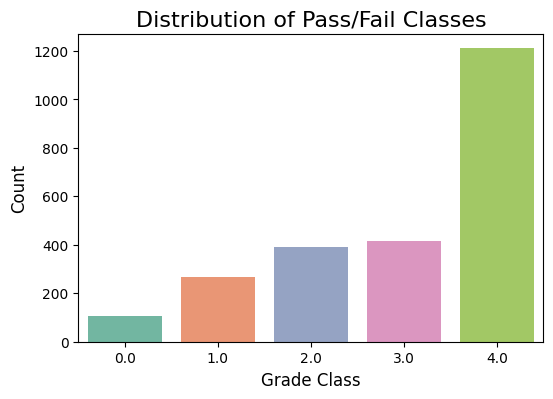


Data Preprocessing

Model Training & Evaluation

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       156
           1       0.95      0.98      0.97       323

    accuracy                           0.95       479
   macro avg       0.96      0.94      0.95       479
weighted avg       0.95      0.95      0.95       479


Confusion Matrix:


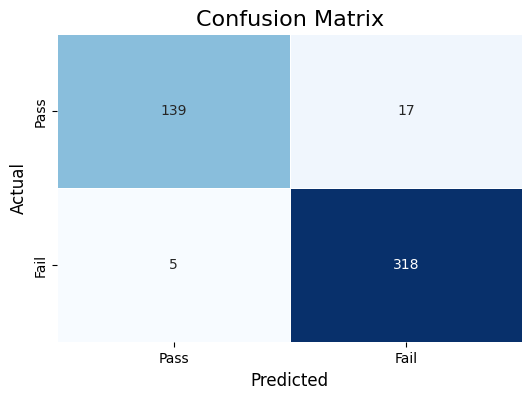


Feature Importance:
+-----------------+----------------------+
|     Feature     |      Importance      |
+-----------------+----------------------+
|       GPA       |  0.6346303890927906  |
|    Absences     | 0.24634003828540066  |
| StudyTimeWeekly | 0.09087609434533615  |
| ParentalSupport | 0.019432643852083018 |
| Extracurricular | 0.008720834424389607 |
+-----------------+----------------------+


<ipython-input-10-309ba9c95004>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")


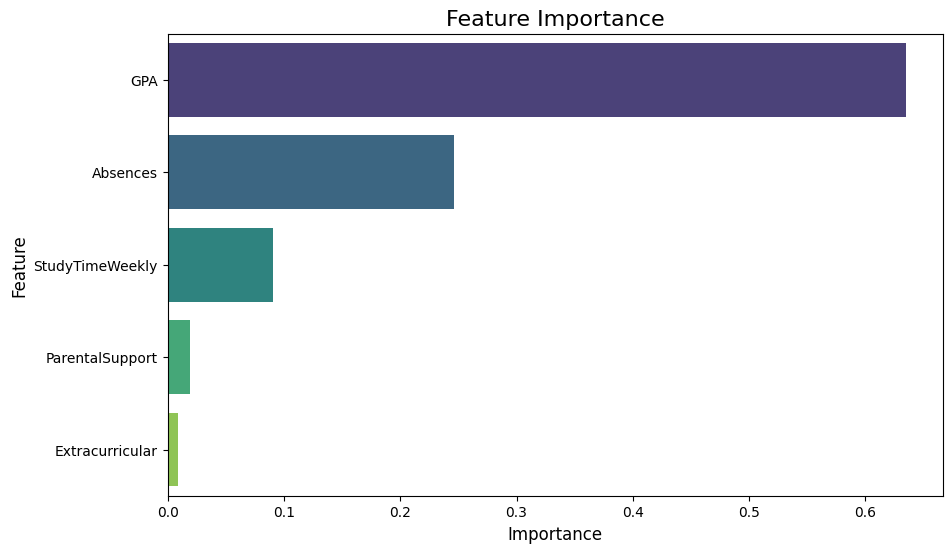


Example Prediction

Sample Features (StudyTime, Absences, GPA, ParentalSupport, Extracurricular):
[[15.   5.   3.5  3.   1. ]]
Predicted Class: Pass


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Load the dataset
data = pd.read_csv('/8. Student Performance Prediction.csv')

# Data Exploration
print("\n" + "="*40)
print("Dataset Exploration")
print("="*40)
print(f"\nDataset Shape: {data.shape}")
print("\nFirst Few Rows:")
print(data.head())
print("\nColumn Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values in Dataset:")
print(data.isnull().sum())

# Visualize the distribution of the target variable (Pass/Fail)
plt.figure(figsize=(6, 4))
sns.countplot(x='GradeClass', data=data, palette="Set2")
plt.title('Distribution of Pass/Fail Classes', fontsize=16)
plt.xlabel('Grade Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Preprocessing
print("\n" + "="*40)
print("Data Preprocessing")
print("="*40)
# Convert GradeClass to binary (0 = pass, 1 = fail)
data['Pass_Fail'] = data['GradeClass'].apply(lambda x: 0 if x <= 2 else 1)

# Select relevant features
features = ['StudyTimeWeekly', 'Absences', 'GPA', 'ParentalSupport', 'Extracurricular']
X = data[features]
y = data['Pass_Fail']

# Check if any features are missing or invalid
missing_features = [col for col in features if col not in data.columns]
if missing_features:
    print(f"\nWarning: The following features are missing from the dataset: {missing_features}")
else:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model Training
    print("\n" + "="*40)
    print("Model Training & Evaluation")
    print("="*40)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Model Evaluation
    y_pred = model.predict(X_test_scaled)

    print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=['Pass', 'Fail'], columns=['Pass', 'Fail'])

    # Improved confusion matrix plot with annotations
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap="Blues", cbar=False, linewidths=0.5)
    plt.title('Confusion Matrix', fontsize=16)
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.show()

    # Feature Importance
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nFeature Importance:")
    print(tabulate(feature_importance, headers='keys', tablefmt='pretty', showindex=False))

    # Plot feature importance with more appealing styling
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")
    plt.title('Feature Importance', fontsize=16)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.show()

    # Example Prediction
    print("\n" + "="*40)
    print("Example Prediction")
    print("="*40)
    sample_student = np.array([[15, 5, 3.5, 3, 1]])  # StudyTime, Absences, GPA, ParentalSupport, Extracurricular
    sample_student_scaled = scaler.transform(sample_student)
    prediction = model.predict(sample_student_scaled)

    print("\nSample Features (StudyTime, Absences, GPA, ParentalSupport, Extracurricular):")
    print(sample_student)
    print(f"Predicted Class: {'Fail' if prediction[0] == 1 else 'Pass'}")

